In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys

# Add the directory containing the Python file to the `sys.path` list
sys.path.append("F:\IMP_DOCUMENT\College material\SEM6\AIProject\Ozone-Prediction-AIProject\Support")

# Import the Python file
import LSTM_Model
import TsPreProcessing

In [5]:
data = pd.read_excel('FinalData-Alipur.xlsx')
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
0,11-11-2018 00:00,12-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,...,None,None,76.73,240.05,29.55,992.08,19.86,0,0.31,0.0
1,12-11-2018 00:00,13-11-2018 00:00,235.81,340.7,4.97,80.06,46.58,35.29,13.32,1.54,...,None,None,77.34,244.45,107.99,990.39,19.82,0,0.31,0.0
2,13-11-2018 00:00,14-11-2018 00:00,285.09,428.91,16.67,111.32,72.8,41.51,21.87,1.34,...,None,None,78.66,219.97,77.29,988.21,20.48,None,0.91,0.0
3,14-11-2018 00:00,15-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1,...,None,None,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
4,15-11-2018 00:00,16-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,...,None,None,79.27,185.82,112.2,992.52,19.82,None,0.57,0.0


In [6]:
# Convert the date column to datetime
from datetime import datetime
df = data.copy()
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['From Date'].min(), df['From Date'].max()
df = df.set_index('To Date')
df.drop(['From Date'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,...,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene,TOT-RF
To Date,,,,,,,,,,,,,,,,,,,,,
2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.7,...,None,None,76.73,240.05,29.55,992.08,19.86,0,0.31,0.0
2018-11-13,235.81,340.7,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,...,None,None,77.34,244.45,107.99,990.39,19.82,0,0.31,0.0
2018-11-14,285.09,428.91,16.67,111.32,72.8,41.51,21.87,1.34,31.22,8.68,...,None,None,78.66,219.97,77.29,988.21,20.48,None,0.91,0.0
2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1,41.93,5.64,...,None,None,77.86,214.38,105.27,989.02,21.22,0.5,0.54,1.0
2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,...,None,None,79.27,185.82,112.2,992.52,19.82,None,0.57,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1599 entries, 2018-11-12 00:00:00 to 2023-03-28 11:31:00
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        1599 non-null   object 
 1   PM10         1599 non-null   object 
 2   NO           1599 non-null   object 
 3   NO2          1599 non-null   object 
 4   Nox          1599 non-null   object 
 5   NH3          1599 non-null   object 
 6   SO2          1599 non-null   object 
 7   CO           1599 non-null   object 
 8   Ozone        1599 non-null   object 
 9   Benzene      1599 non-null   object 
 10  Toluene      1599 non-null   object 
 11  Eth-Benzene  1599 non-null   object 
 12  MP-Xylene    1599 non-null   object 
 13  RH           1599 non-null   object 
 14  WD           1599 non-null   object 
 15  SR           1599 non-null   object 
 16  BP           1599 non-null   object 
 17  AT           1599 non-null   object 
 18  RF          

In [8]:
# df.drop(['Temp'], axis=1, inplace=True)
num_cols = df.columns
num_cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WD', 'SR',
       'BP', 'AT', 'RF', 'Xylene', 'TOT-RF'],
      dtype='object')

In [9]:
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)


In [10]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())

Rows  :   1599
Columns :  21

Features : 
 ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WD', 'SR', 'BP', 'AT', 'RF', 'Xylene', 'TOT-RF']


In [11]:

print("\nMissing values : \n",df.isnull().any())


Missing values : 
 PM2.5           True
PM10            True
NO              True
NO2             True
Nox             True
NH3             True
SO2             True
CO              True
Ozone           True
Benzene         True
Toluene         True
Eth-Benzene     True
MP-Xylene       True
RH              True
WD              True
SR              True
BP              True
AT              True
RF              True
Xylene          True
TOT-RF         False
dtype: bool


In [12]:
print("\nUnique values : \n",df.nunique())


Unique values : 
 PM2.5          1522
PM10           1544
NO             1030
NO2            1392
Nox            1369
NH3            1295
SO2            1156
CO              220
Ozone          1375
Benzene         559
Toluene        1182
Eth-Benzene       0
MP-Xylene         6
RH             1337
WD             1508
SR             1508
BP             1134
AT             1173
RF               99
Xylene          401
TOT-RF           76
dtype: int64


# Visualizing The Data for Ashok Vihar

In [13]:
oz_data = df['Ozone']
oz_data.head()

To Date
2018-11-12    39.13
2018-11-13    44.63
2018-11-14    31.22
2018-11-15    41.93
2018-11-16    28.81
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='To Date'>

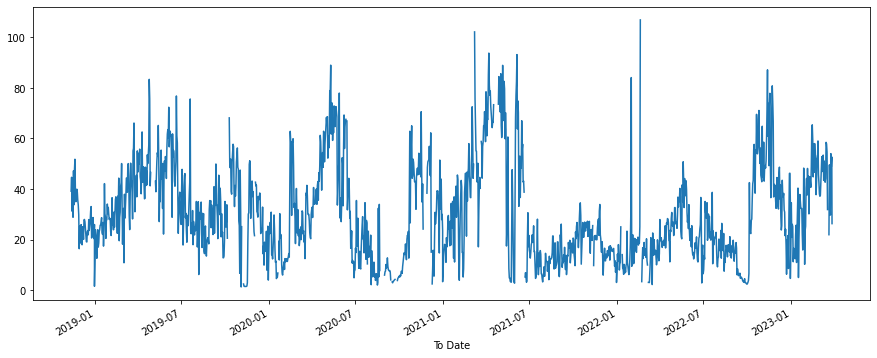

In [14]:
oz_data.plot(figsize=(15, 6))

In [15]:
import plotly.express as px
fig = px.line(oz_data, x=oz_data.index, y=oz_data.values, title='Ozone Concentration')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

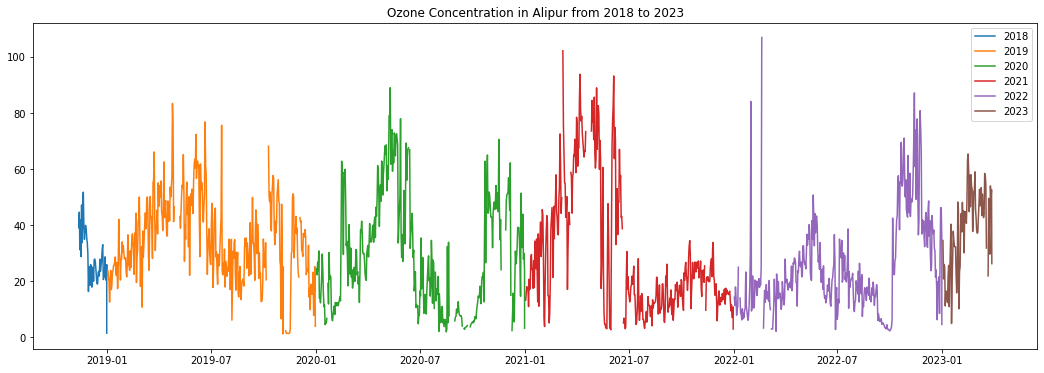

In [16]:

year = ['2018','2019','2020','2021','2022','2023']
# all plots in one figure
plt.figure(figsize=(18,6))
for i in year:
    df_year = df.loc[i]
    # print(df_year[0])
    plt.plot(df_year['Ozone'],label=i)
plt.legend(loc='best')
# on x-axis only years are shown
# plt.xticks(np.arange(0, 365, 30))
plt.title('Ozone Concentration in Alipur from 2018 to 2023')
plt.show()

In [34]:
# i want to group by month
aq_df = df.copy()
aq_df['month'] = df.index.month
aq_df['year'] = df.index.year
aq_df['day'] = df.index.day
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,...,WD,SR,BP,AT,RF,Xylene,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,,,,
2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,...,240.05,29.55,992.08,19.86,0.0,0.31,0.0,11,2018,12
2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,...,244.45,107.99,990.39,19.82,0.0,0.31,0.0,11,2018,13
2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,...,219.97,77.29,988.21,20.48,NaN,0.91,0.0,11,2018,14
2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,...,214.38,105.27,989.02,21.22,0.5,0.54,1.0,11,2018,15
2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,...,185.82,112.20,992.52,19.82,NaN,0.57,0.0,11,2018,16


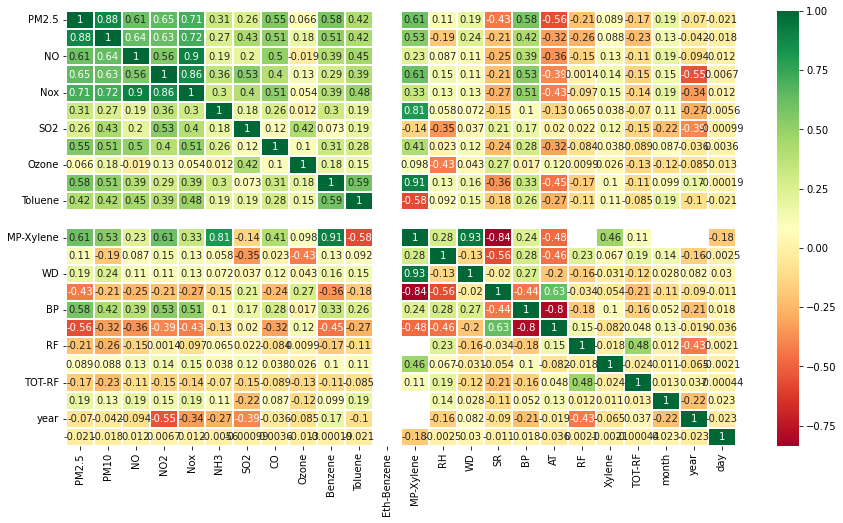

In [35]:
aq_corr = aq_df.corr(method='pearson')
g = sns.heatmap(aq_corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# LSTM Model Training for Ashok Vihar

In [36]:
# dropping the null values
# aq_df.dropna(inplace=True)
aq_df.isnull().sum()

PM2.5            20
PM10             16
NO               17
NO2              17
Nox              17
NH3              32
SO2              33
CO               19
Ozone            61
Benzene         115
Toluene         115
Eth-Benzene    1599
MP-Xylene      1593
RH               16
WD               16
SR               16
BP               17
AT               17
RF              867
Xylene          117
TOT-RF            0
month             0
year              0
day               0
dtype: int64

In [40]:
aq_df.head()

""
To Date


In [21]:
# define the train and test data
x_train = aq_df[:'2022-01-01']
y_train = x_train['Ozone']
x_test = aq_df['2022-01-01':]
y_test = x_test['Ozone']
print(y_test)

Series([], Name: Ozone, dtype: float64)


In [22]:
# transforming and normalizing the data
train_norm = TsPreProcessing.Transform_Normalize(x_train['Ozone'])
test_norm = TsPreProcessing.Transform_Normalize(x_test['Ozone'])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [23]:
print(train_norm.shape)
print(test_norm.shape)

NameError: name 'train_norm' is not defined

In [ ]:
n_steps = 15 #number of steps to look back
X_split_train, y_split_train = TsPreProcessing.split_sequence(train_norm, n_steps)
for i in range(len(X_split_train)):
    print(X_split_train[i], y_split_train[i])
n_features = 1 #number of features (in this case it is just the number of columns in the dataframe)
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

In [ ]:
X_split_test, y_split_test = TsPreProcessing.split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))


[0.18183157 0.2081861  0.21304476 0.22820966 0.15827444 0.15356302
 0.16828622 0.20524146 0.19994111 0.12441107 0.18772085 0.21407538
 0.2656066  0.14914605 0.0721437 ] 0.18330388692579502
[0.2081861  0.21304476 0.22820966 0.15827444 0.15356302 0.16828622
 0.20524146 0.19994111 0.12441107 0.18772085 0.21407538 0.2656066
 0.14914605 0.0721437  0.18330389] 0.2396937573616019
[0.21304476 0.22820966 0.15827444 0.15356302 0.16828622 0.20524146
 0.19994111 0.12441107 0.18772085 0.21407538 0.2656066  0.14914605
 0.0721437  0.18330389 0.23969376] 0.19611307420494697
[0.22820966 0.15827444 0.15356302 0.16828622 0.20524146 0.19994111
 0.12441107 0.18772085 0.21407538 0.2656066  0.14914605 0.0721437
 0.18330389 0.23969376 0.19611307] 0.15871613663133097
[0.15827444 0.15356302 0.16828622 0.20524146 0.19994111 0.12441107
 0.18772085 0.21407538 0.2656066  0.14914605 0.0721437  0.18330389
 0.23969376 0.19611307 0.15871614] 0.2179034157832744


In [ ]:
# import the fucntion for Support folder from the same directory
from LSTM_Model import build_lstm_model
n_steps = 15
n_features = 1
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_hidden_layers = 2
num_units_hidden_layers = 32
activation_function = 'tanh'
dropout_rate = 0.2

model = build_lstm_model(input_shape, num_lstm_units, num_hidden_layers, num_units_hidden_layers, dropout_rate)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
#  fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)

Epoch 1/50
39/39 [==============================] - 4s 42ms/step - loss: 0.0568 - mae: 0.1905 - val_loss: 0.0244 - val_mae: 0.1334
Epoch 2/50
39/39 [==============================] - 1s 23ms/step - loss: 0.0182 - mae: 0.1043 - val_loss: 0.0163 - val_mae: 0.1063
Epoch 3/50
39/39 [==============================] - 2s 42ms/step - loss: 0.0149 - mae: 0.0946 - val_loss: 0.0106 - val_mae: 0.0775
Epoch 4/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0138 - mae: 0.0893 - val_loss: 0.0093 - val_mae: 0.0680
Epoch 5/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0131 - mae: 0.0874 - val_loss: 0.0095 - val_mae: 0.0693
Epoch 6/50
39/39 [==============================] - 0s 11ms/step - loss: 0.0124 - mae: 0.0850 - val_loss: 0.0092 - val_mae: 0.0640
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0120 - mae: 0.0837 - val_loss: 0.0099 - val_mae: 0.0701
Epoch 8/50
39/39 [==============================] - 0s 13ms/step - loss: 0.0119 - ma

In [ ]:
yhat = model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
r2 = r2_score(y_split_test, yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 5ms/step
MSE: 0.00919
RMSE: 0.09585
R2: 0.76501


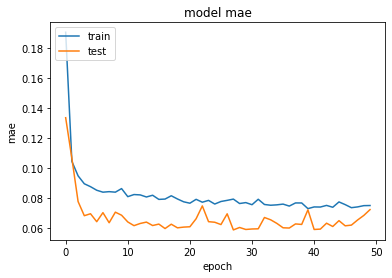

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

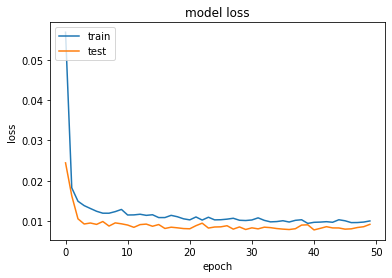

In [ ]:
# Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

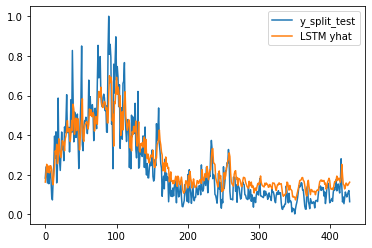

In [ ]:
# plot yhat and y_split_test
plt.plot(y_split_test, label= 'Actual')
plt.plot(yhat, label='LSTM Prediction')
plt.legend()

# Model Training for Ashok Vihar BiDirectional LSTM

In [ ]:
from LSTM_Model import build_bidirectional_lstm_model
from keras.optimizers import Adam

n_steps = 10
n_features = 5
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_dense_units = 50
dense_activation_function = 'tanh'
optimizer = Adam(lr=0.001)

B_model = build_bidirectional_lstm_model(input_shape, num_lstm_units, num_dense_units, dense_activation_function, optimizer)

#  fit model
hist = B_model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



39/39 [==============================] - 4s 25ms/step - loss: 0.0262 - mae: 0.1231 - val_loss: 0.0136 - val_mae: 0.0955
Epoch 2/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0120 - mae: 0.0844 - val_loss: 0.0104 - val_mae: 0.0777
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0807 - val_loss: 0.0100 - val_mae: 0.0760
Epoch 4/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0108 - mae: 0.0790 - val_loss: 0.0092 - val_mae: 0.0695
Epoch 5/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0106 - mae: 0.0781 - val_loss: 0.0089 - val_mae: 0.0668
Epoch 6/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0102 - mae: 0.0760 - val_loss: 0.0094 - val_mae: 0.0718
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0102 - mae: 0.0762 - val_loss: 0.0092 - val_mae: 0.0707
Epoch 8/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0750 - 

In [ ]:
B_yhat = B_model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, B_yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
# R2 score
r2 = r2_score(y_split_test, B_yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 6ms/step
MSE: 0.00803
RMSE: 0.08962
R2: 0.79455


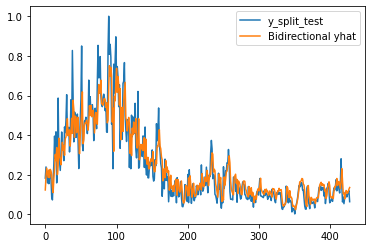

In [ ]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(B_yhat, label='Bidirectional yhat')
plt.legend()

# Model Training for Ashok Vihar ML Models

In [ ]:
Xml = aq_df.drop(['Ozone'], axis=1)
yml = aq_df['Ozone']
# to array

Xml = Xml.values
yml = yml.values

print(Xml)
print(yml)

[[5.4790e+01 1.0537e+02 2.0200e+00 ... 6.0000e+00 2.0180e+03 2.8000e+01]
 [2.7030e+01 4.9540e+01 2.4300e+00 ... 6.0000e+00 2.0180e+03 2.9000e+01]
 [3.6510e+01 8.1590e+01 5.0500e+00 ... 6.0000e+00 2.0180e+03 3.0000e+01]
 ...
 [4.8390e+01 1.7865e+02 7.9700e+00 ... 3.0000e+00 2.0230e+03 2.7000e+01]
 [4.8400e+01 1.3164e+02 5.0100e+00 ... 3.0000e+00 2.0230e+03 2.8000e+01]
 [8.5820e+01 1.9827e+02 1.1100e+01 ... 3.0000e+00 2.0230e+03 2.9000e+01]]
[66.8  45.97 49.34 ... 11.15 11.66  7.85]


In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xml, yml, test_size=0.3, random_state=0)

# MLR Multivariate Linear Regression Model Training for Ashok Vihar

MSE: 124.85358
RMSE: 11.17379
R2: 0.57166


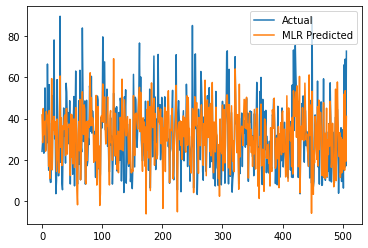

In [ ]:
# write the function for the MLR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_mlr_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the MLR model
mlr_model, mlr_yhat = build_mlr_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='Actual')
plt.plot(mlr_yhat, label='MLR Predicted')
plt.legend()

# Random Forest Model Training for Ashok Vihar

MSE: 74.13415
RMSE: 8.61012
R2: 0.74566


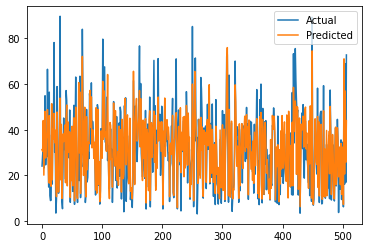

In [ ]:

# write the function for the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the Random Forest model
rf_model, rf_yhat = build_rf_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
# plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual')
plt.plot(rf_yhat, label='Predicted')
plt.legend()
